In [2]:
!pip install imgaug

     |████████████████████████████████| 829kB 6.4MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 16.3MB/s eta 0:00:01
     |████████████████████████████████| 45.5MB 14.4MB/s eta 0:00:01


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.applications import VGG16
from keras.applications import ResNet50
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
from keras import backend as K
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.font_manager as fm
from keras.models import load_model

In [32]:
base_dir = "/Users/joannakang/Desktop/CatsandDogs"

In [33]:
train_data_dir = os.path.join(base_dir, 'train')
test_data_dir = os.path.join(base_dir, 'test')

In [34]:
train_data_dir

'/Users/joannakang/Desktop/CatsandDogs/train'

In [35]:
class_name = os.listdir(train_data_dir)
print(class_name)

['dogs', 'cats', '.DS_Store']


In [36]:
class_name = class_name[0:2]

In [37]:
print(class_name)

['dogs', 'cats']


In [38]:
train_input = []
train_label = []
val_input = []
val_label = []
test_input = []
test_label = []

In [39]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[0. 1.]
 [1. 0.]]


/Users/joannakang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [40]:
#range(2) : 0, 1
for i in range(len(class_name)):
    path = os.path.join(train_data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 3))
        train_input.append(img)
        train_label.append(onehot_encoded[i])

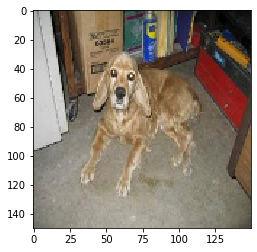

In [41]:
plt.imshow(train_input[0])

In [42]:
for i in range(len(class_name)):
    path = os.path.join(test_data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 3))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [43]:
train_input, val_input, train_label, val_label = train_test_split(train_input, train_label, test_size=0.2, random_state=32)

In [44]:
print(len(train_input))
print(len(val_input))
print(len(test_input))

160
40
28


In [45]:
train_input = np.array(train_input)
train_label = np.array(train_label)
val_input = np.array(val_input)
val_label = np.array(val_label)
test_input = np.array(test_input)
test_label = np.array(test_label)

In [46]:
print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

(160, 150, 150, 3)
(40, 150, 150, 3)
(28, 150, 150, 3)


In [47]:
pre_trained_model = VGG16()

In [48]:
pre_trained_model = VGG16(include_top = False, input_shape = (150, 150, 3))

In [49]:
pre_trained_model.trainable = False

In [50]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [51]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(7, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 57351     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 16        
Total params: 14,772,055
Trainable params: 57,367
Non-trainable params: 14,714,688
_________________________________________________________________


In [53]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
history = model.fit(x = train_input, y = train_label, validation_data = (val_input, val_label), batch_size = 5, epochs = 1)

Train on 160 samples, validate on 40 samples
Epoch 1/1
160/160 [==============================] - 21s 130ms/step - loss: 4.7899 - accuracy: 0.6438 - val_loss: 3.6910 - val_accuracy: 0.7000


In [55]:
result = model.predict(test_input)

In [56]:
print(result)

[[2.7078367e-13 1.0000000e+00]
 [1.0000000e+00 3.6268608e-09]
 [8.9885624e-08 9.9999988e-01]
 [1.0000000e+00 2.0721013e-19]
 [9.8530244e-08 9.9999988e-01]
 [3.5392523e-16 1.0000000e+00]
 [4.4521511e-11 1.0000000e+00]
 [1.7933928e-06 9.9999821e-01]
 [1.0000000e+00 8.9450134e-17]
 [6.2287588e-09 1.0000000e+00]
 [1.2705430e-12 1.0000000e+00]
 [1.0298795e-15 1.0000000e+00]
 [5.8621450e-17 1.0000000e+00]
 [2.0604639e-22 1.0000000e+00]
 [2.8453532e-03 9.9715459e-01]
 [1.0000000e+00 4.6545909e-21]
 [1.0000000e+00 1.2728131e-31]
 [1.0000000e+00 4.4154889e-23]
 [9.9662113e-01 3.3788241e-03]
 [1.0000000e+00 2.2673146e-37]
 [1.0000000e+00 5.1493488e-15]
 [1.0000000e+00 2.3437656e-34]
 [3.9293909e-07 9.9999964e-01]
 [1.0000000e+00 6.3380479e-34]
 [1.0000000e+00 8.3379028e-22]
 [1.0000000e+00 2.8646160e-20]
 [2.5838550e-02 9.7416151e-01]
 [1.0000000e+00 0.0000000e+00]]


In [86]:
on_gothic = "/Users/joannakang/Desktop/ongo.ttf"
fontprop1 = fm.FontProperties(fname=on_gothic, size=13)

In [88]:
print(fontprop1)

:family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=/Users/joannakang/Desktop/ongo.ttf:size=13.0


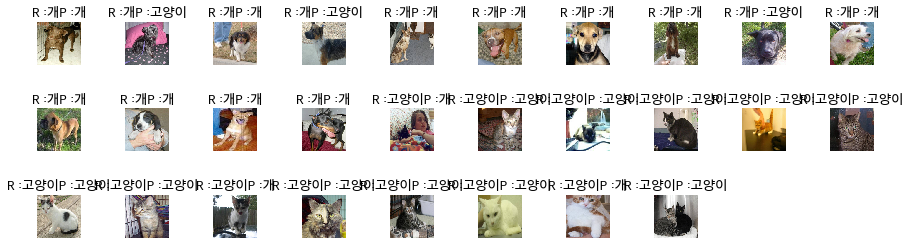

In [91]:
plt.figure(figsize=(15, 15))

for i in range(len(test_input)):
    plt.subplot(3, 10, i + 1)
    plt.axis('off')
    plt.imshow(test_input[i])
    plt.title('R :' + test_real_label[i] + 'P :' + test_predicted_label[i], fontproperties = fontprop1)
    plt.subplots_adjust(top = 1, bottom= 0.8, hspace= 1, wspace= 1)
plt.show()

In [92]:
test_real_label = []
test_predicted_label = []

In [93]:
for i in range(len(test_label)):
    if str(np.argmax(test_label[i])) == '0':
        test_real_label.append('고양이')
    else:
        test_real_label.append('개')

In [94]:
print(test_real_label)

['개', '개', '개', '개', '개', '개', '개', '개', '개', '개', '개', '개', '개', '개', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이', '고양이']


In [95]:
for i in range(len(result)):
    if str(np.argmax(result[i])) == '0':
        test_predicted_label.append('고양이')
    else:
        test_predicted_label.append('개')